In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Reading Data
file_path = ("/kaggle/input/salary-data/Salary_Data.csv")
salary = pd.read_csv(file_path)

## Understanding Data

In [3]:
salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
salary.shape

(6704, 6)

In [5]:
salary.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [6]:
#Checking how many null values in each feature
salary.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [7]:
#Checking unique values in Job Title Feature

salary['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [8]:
#Checking unique values of Education Level feature

salary['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

# Cleaning Data


In [9]:
rows_with_null = salary[salary.isnull().any(axis=1)]

rows_with_null

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [10]:
# row 172,260 : seems that we will remove this row as there is no any values that can help us (NaN).
# row 2011 : Education level will be important here as we see because I think the salary is too big , so it would be great to get the education level
# row 3136 , 6455 : Salary is important too , as it is our target in our project
# row 5247 : Salary is important as we said before but there is also years of experience we gonna need



In [11]:
# We used the mode instead of the mean or median because this feature isn't numerical

salary['Education Level'].fillna(salary['Education Level'].mode().iloc[0],inplace=True)




In [12]:
salary['Years of Experience'].fillna(salary['Years of Experience'].mean(),inplace=True)



In [13]:
salary['Salary'].fillna(salary['Salary'].mean(),inplace=True)


In [14]:
salary[salary.isnull().any(axis=1)]



,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,Bachelor's Degree,NaN,8.094687,115326.964771
260,NaN,NaN,Bachelor's Degree,NaN,8.094687,115326.964771


In [15]:
# Drop rows with missing values in 'Age' , 'Gender' and , 'Job Title' columns
salary.dropna(subset=['Age', 'Gender','Job Title'], inplace=True)


In [16]:
rows_with_null = salary[salary.isnull().any(axis=1)]

rows_with_null

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [17]:
salary.describe()

,Age,Years of Experience,Salary
count,6702.000000,6702.000000,6702.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.058551,52774.366549
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [18]:
# I guess we finished our data cleaining by checking missing values and fix  this by replacing or removing these values


# More Understanding


In [19]:
# Getting people who has salary equal or greater than the average
salary_avg = salary[salary.Salary >= salary.Salary.mean()]

salary_avg

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
4,52.0,Male,Master's,Director,20.0,200000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
11,48.0,Female,Bachelor's,HR Manager,18.0,140000.0
13,40.0,Female,Master's,Project Manager,14.0,130000.0
...,...,...,...,...,...,...
6690,42.0,Male,Bachelor's Degree,Financial Manager,13.0,130000.0
6693,43.0,Female,Master's Degree,Sales Manager,14.0,140000.0
6697,51.0,Female,Master's Degree,Senior Product Marketing Manager,19.0,190000.0
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0


In [20]:
# Getting people who has Years of Experience equal or greater than the average
Years_avg = salary[salary['Years of Experience']>= salary['Years of Experience'].mean()]

Years_avg

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
4,52.0,Male,Master's,Director,20.0,200000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0
11,48.0,Female,Bachelor's,HR Manager,18.0,140000.0
...,...,...,...,...,...,...
6691,36.0,Female,PhD,Marketing Manager,9.0,95000.0
6693,43.0,Female,Master's Degree,Sales Manager,14.0,140000.0
6697,51.0,Female,Master's Degree,Senior Product Marketing Manager,19.0,190000.0
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0


# Data Visualizations

In [21]:
plt.style.use('seaborn')

/tmp/ipykernel_20/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


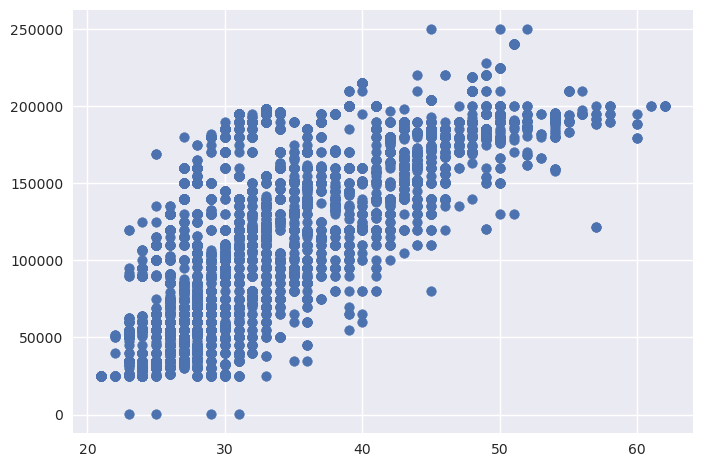

In [22]:
#Relationship between Age and Salary
plt.scatter(salary['Age'],salary['Salary'])
plt.show()

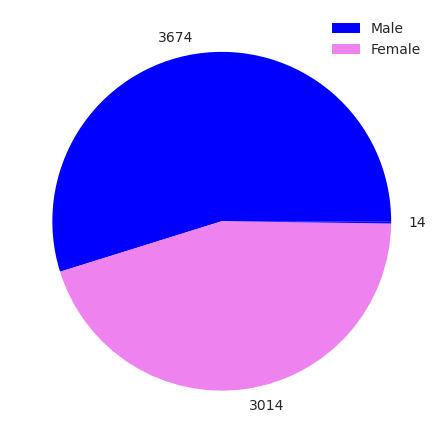

In [23]:
# Create a pie chart of gender result counts
labels = ["Male" , "Female"]
colors = ['blue', 'violet']
gender_counts = salary['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts,colors=colors)
plt.legend(labels)
plt.show()

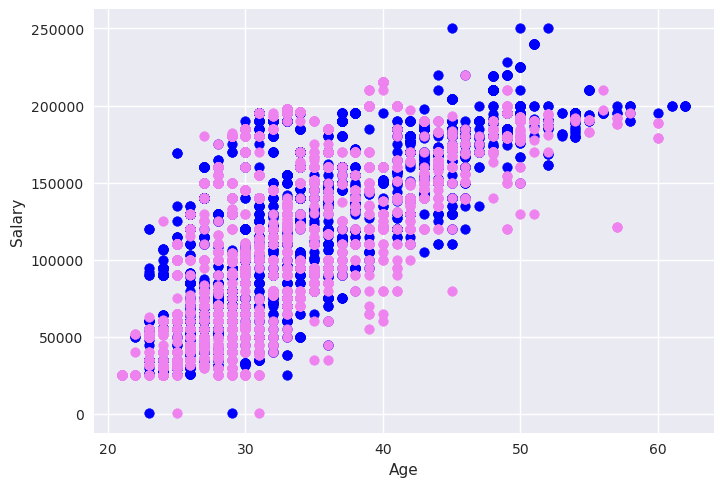

In [24]:
male = salary[salary.Gender == 'Male']
female = salary[salary.Gender == 'Female']

#Relationship between Age and Salary According to the gender
plt.scatter(male.Age , male.Salary , c = 'b')
plt.scatter(female.Age , female.Salary , c = 'violet')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

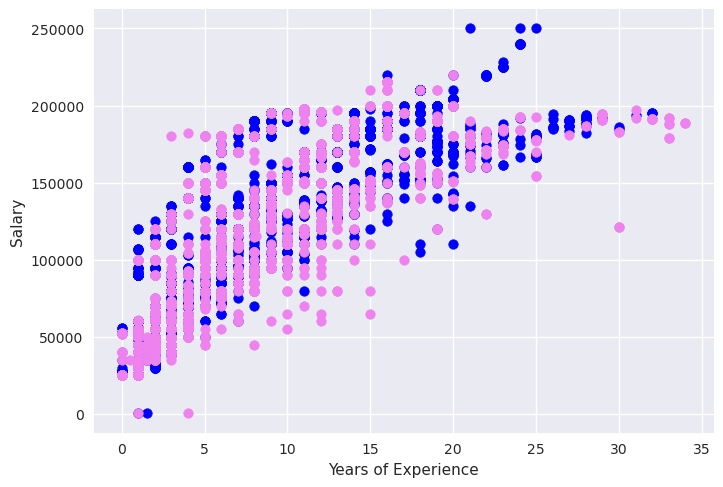

In [25]:
#Relationship between Years of Experience and Salary According to the gender

plt.scatter(male["Years of Experience"] , male.Salary , c = 'b')
plt.scatter(female["Years of Experience"] , female.Salary , c = 'violet')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

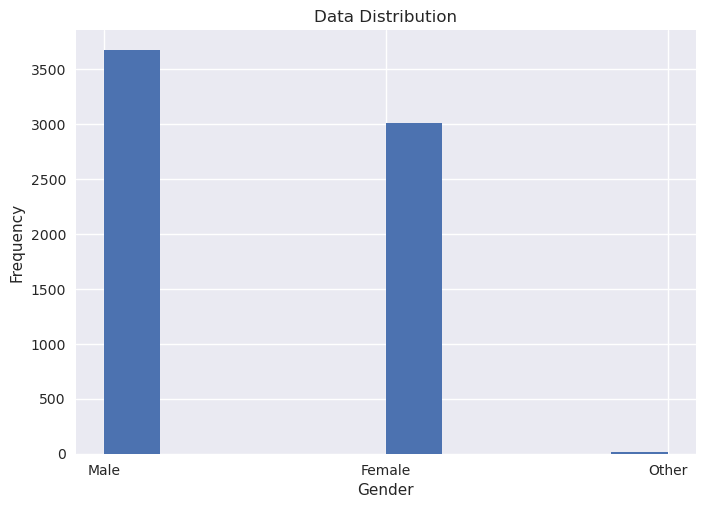

In [26]:
plt.hist(salary.Gender)
plt.title('Data Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

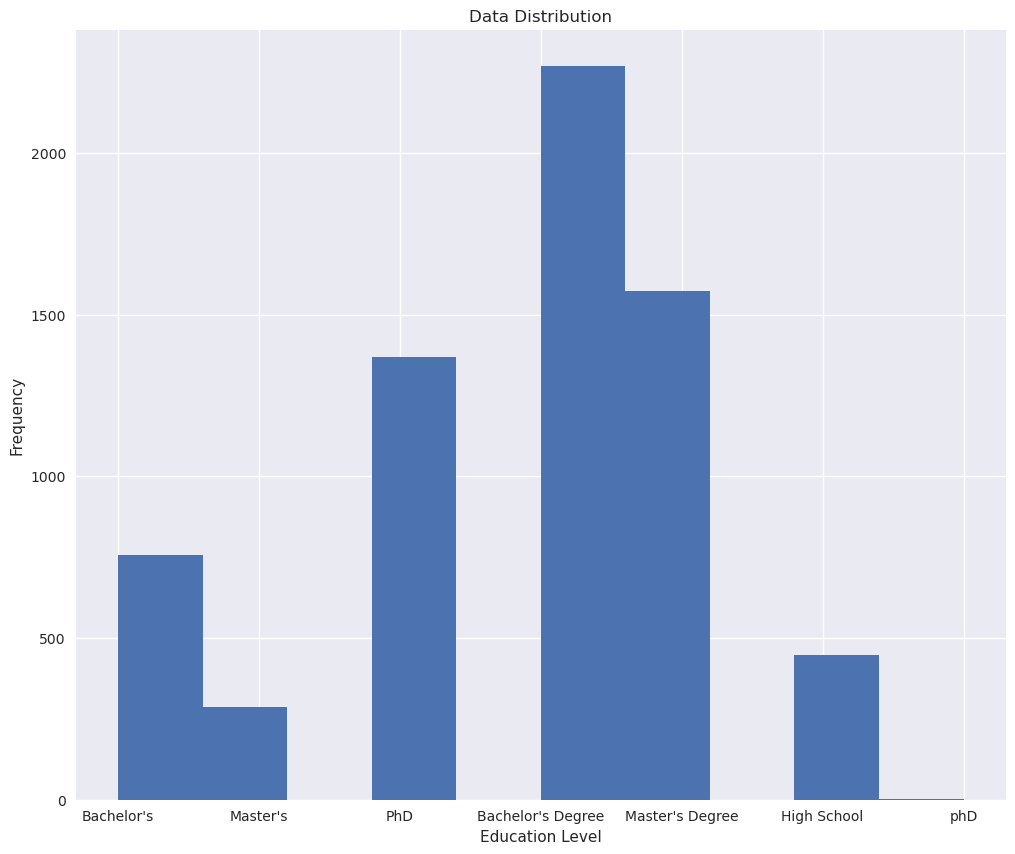

In [27]:
plt.figure(figsize=(12, 10))
plt.hist(salary["Education Level"])
plt.title('Data Distribution')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

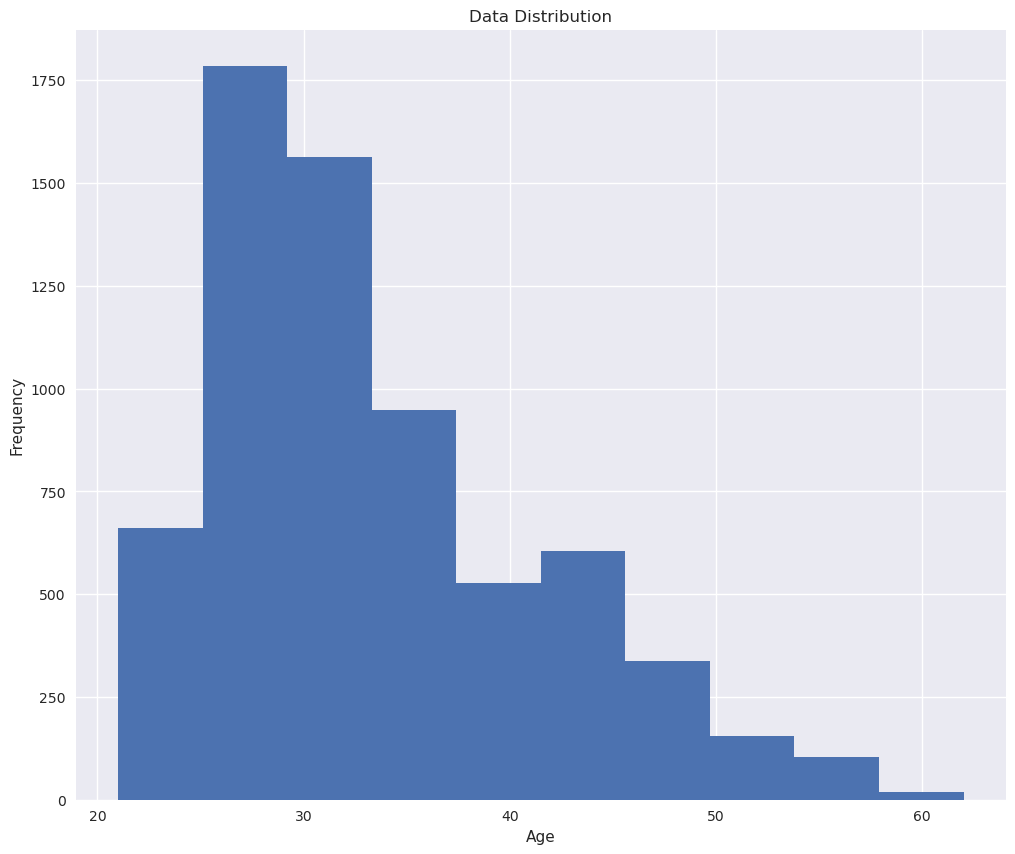

In [28]:
plt.figure(figsize=(12, 10))
plt.hist(salary["Age"])
plt.title('Data Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

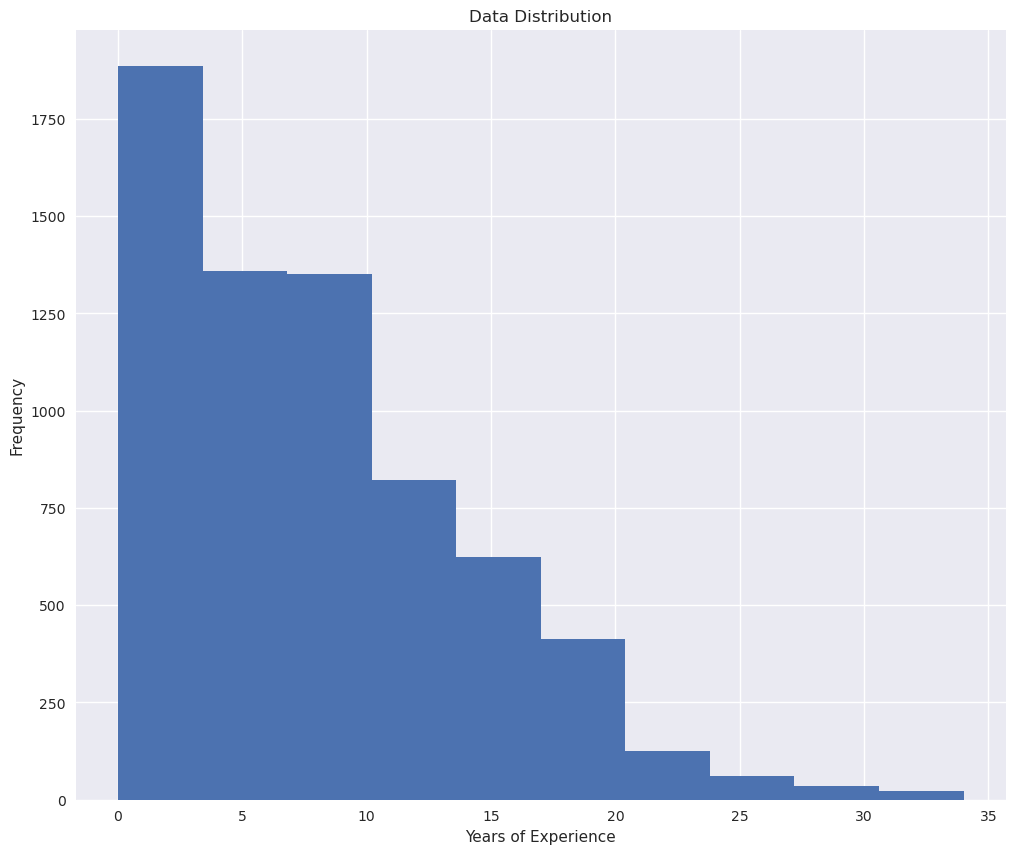

In [29]:
plt.figure(figsize=(12, 10))
plt.hist(salary["Years of Experience"])
plt.title('Data Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

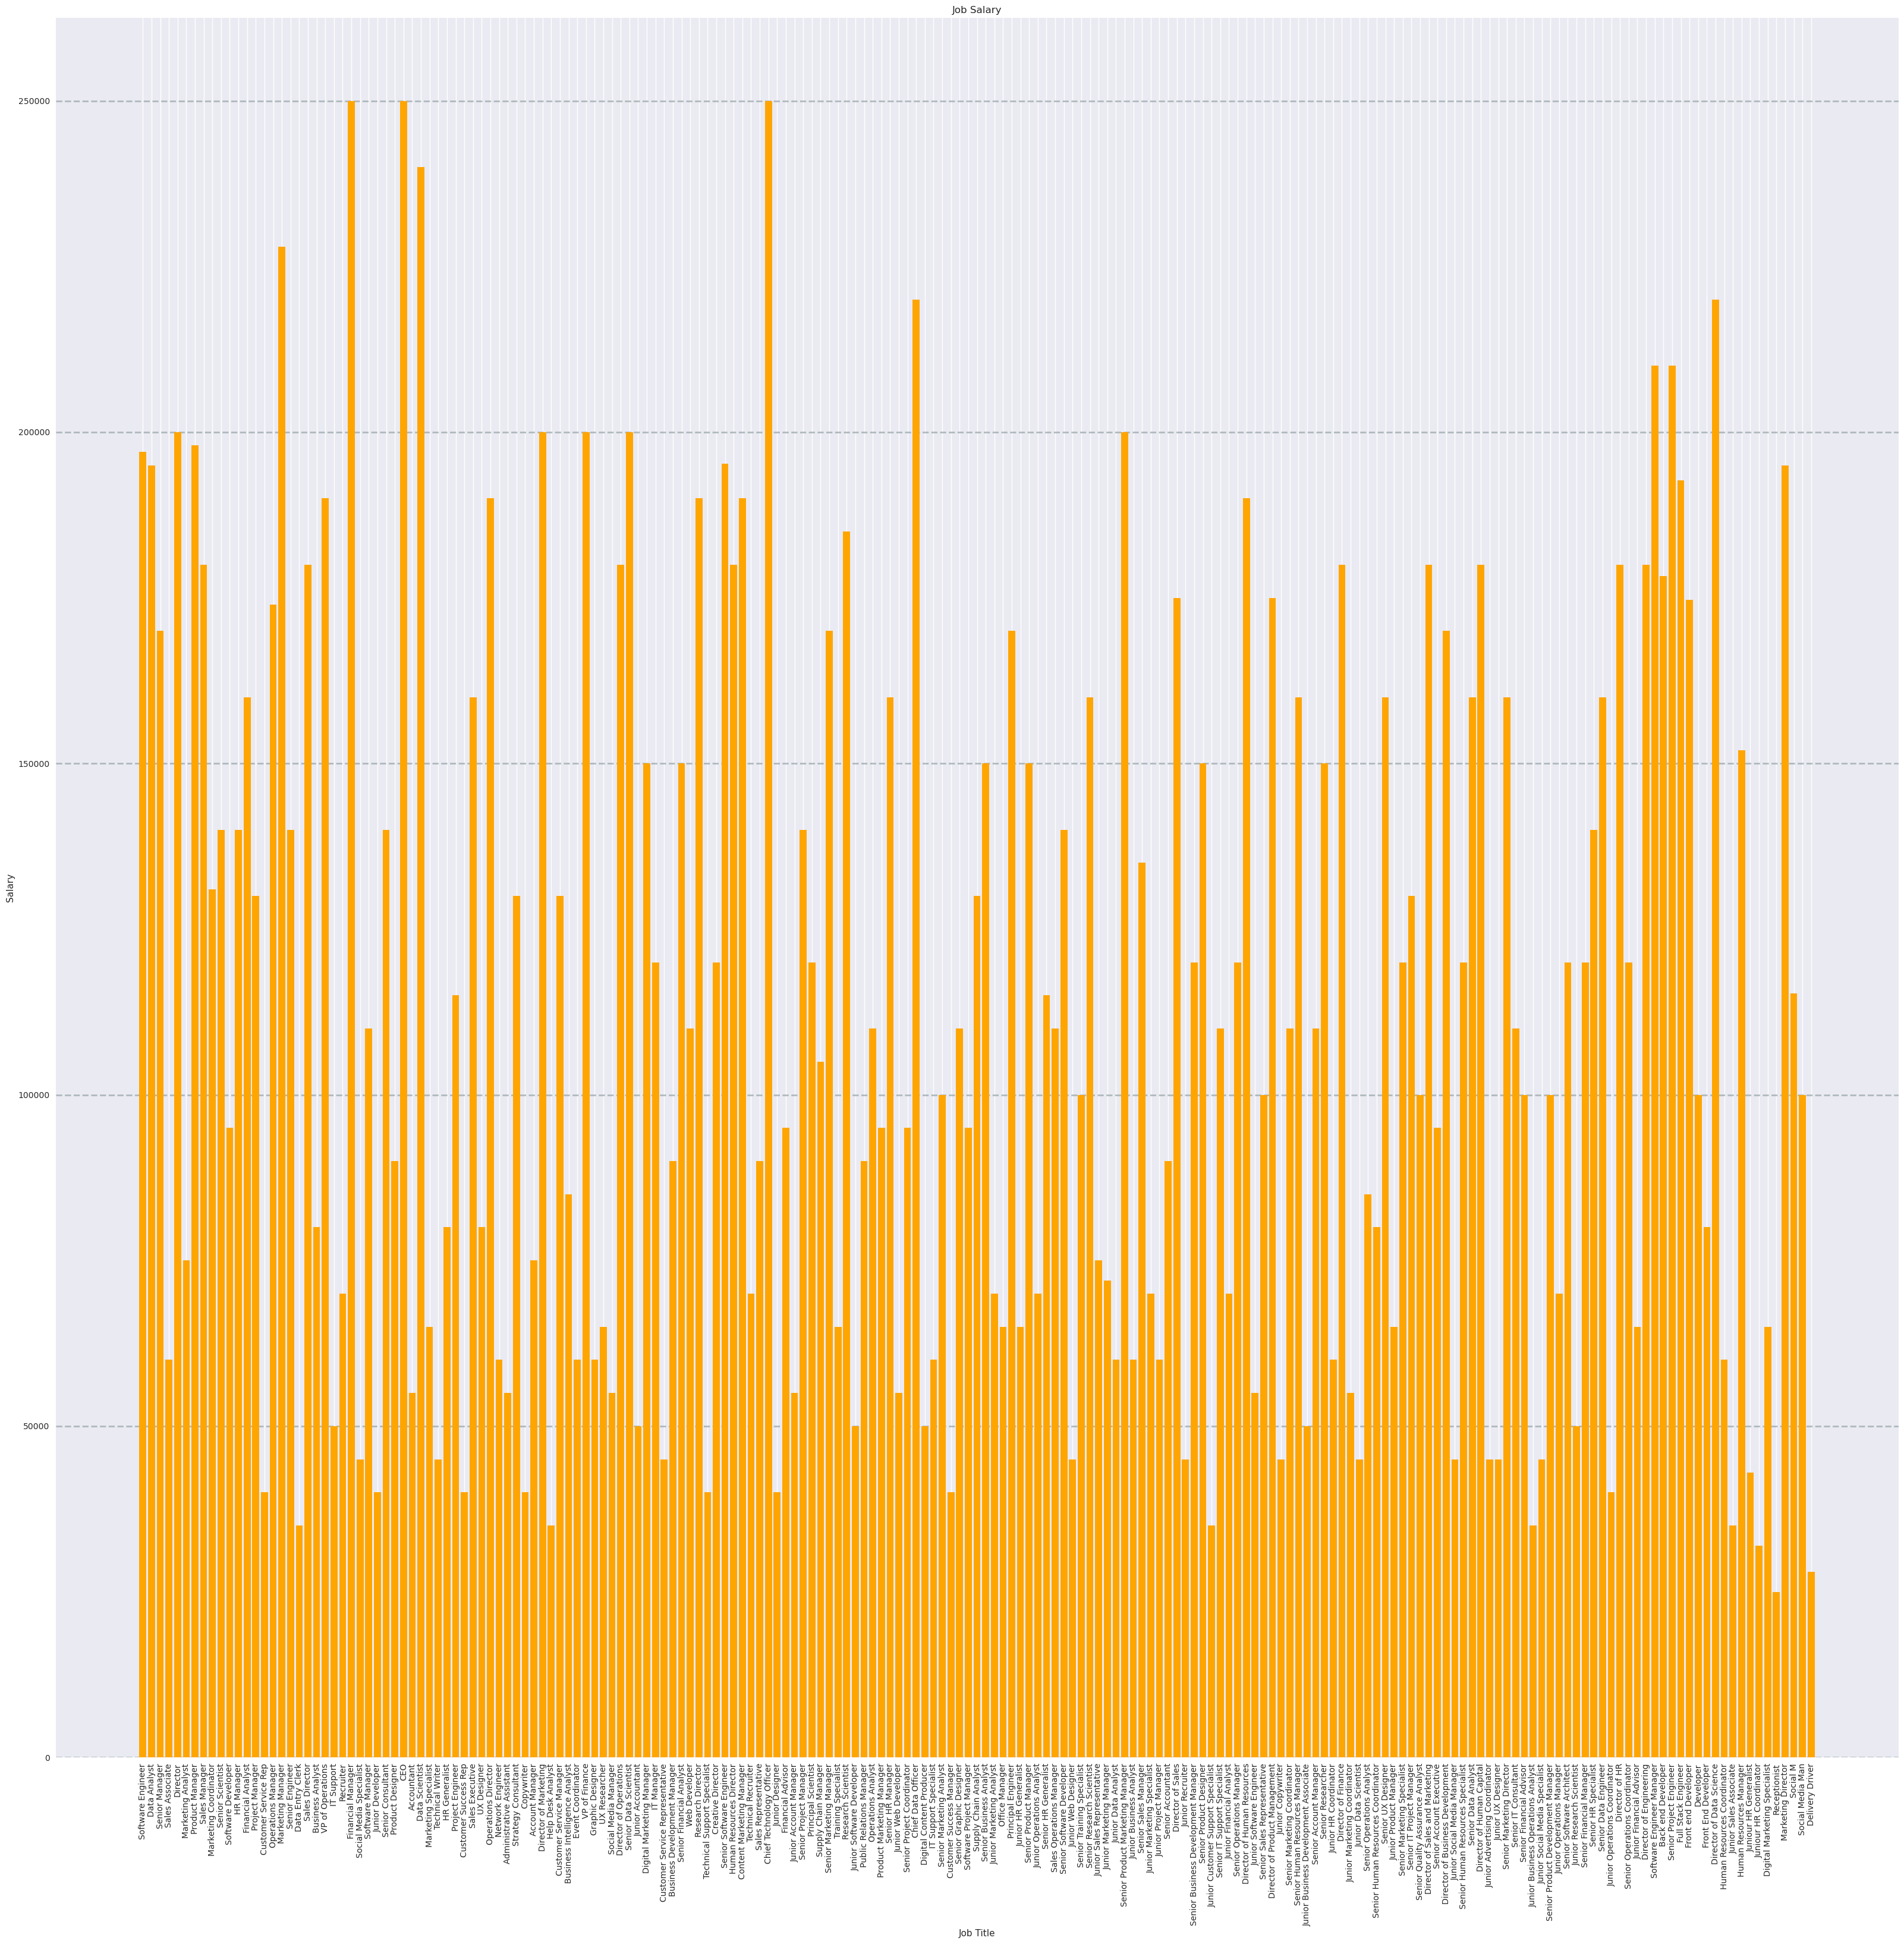

In [30]:
# Create a bar plot of name vs grade
plt.figure(figsize=(40, 38))

plt.bar(x=salary["Job Title"], height=salary["Salary"], color='orange')

# Customize the chart
plt.title('Job Salary')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

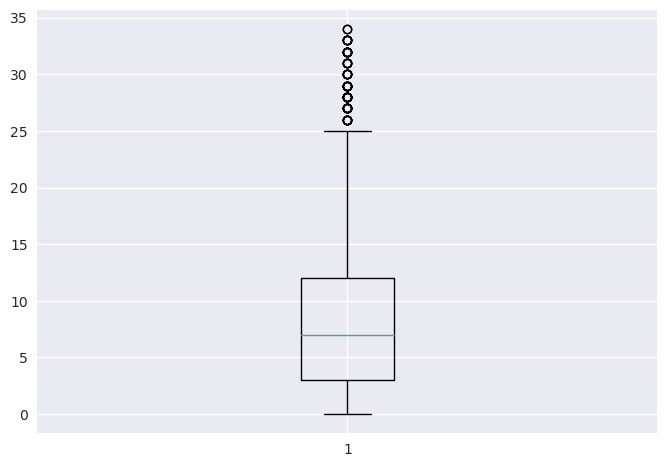

In [31]:
plt.boxplot(salary["Years of Experience"])
plt.show()

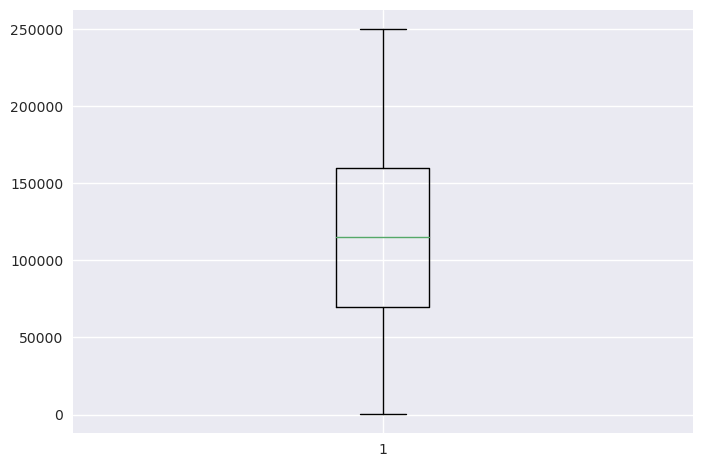

In [32]:
plt.boxplot(salary["Salary"])
plt.show()

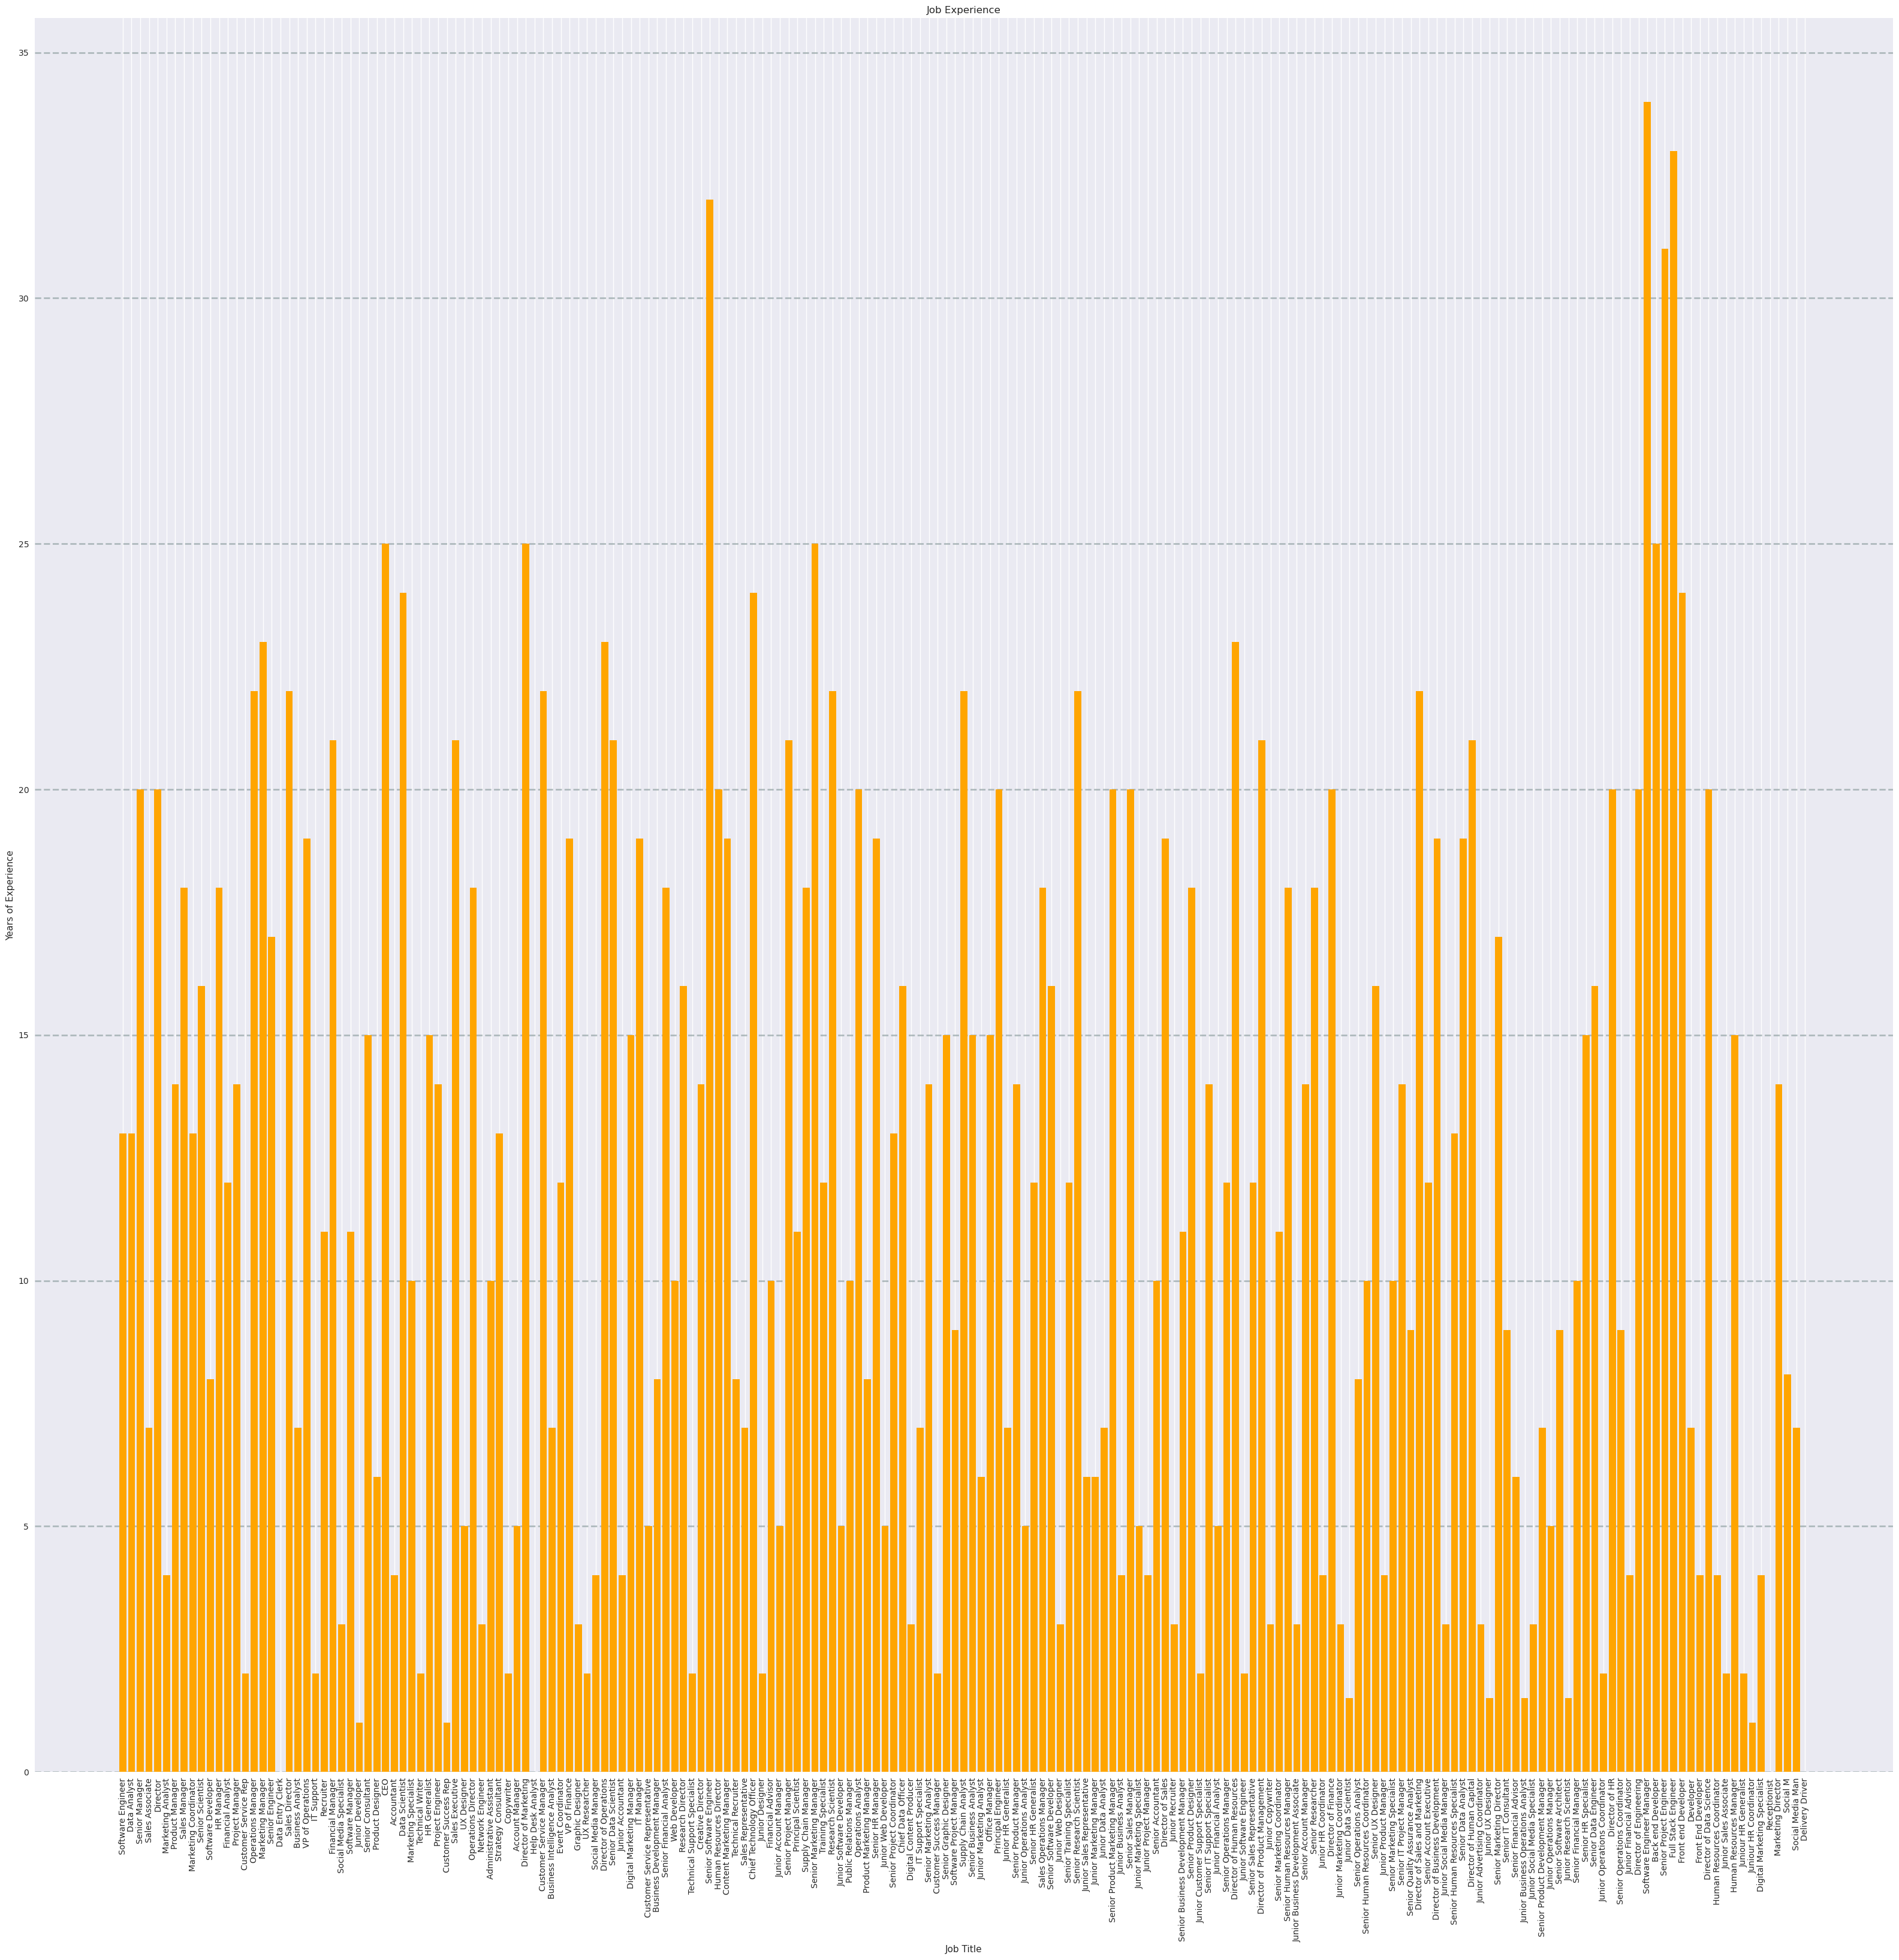

In [33]:
# Create a bar plot of name vs grade
plt.figure(figsize=(40, 38))

plt.bar(x=salary["Job Title"], height=salary["Years of Experience"], color='orange')

# Customize the chart
plt.title('Job Experience')
plt.xlabel('Job Title')
plt.ylabel('Years of Experience')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


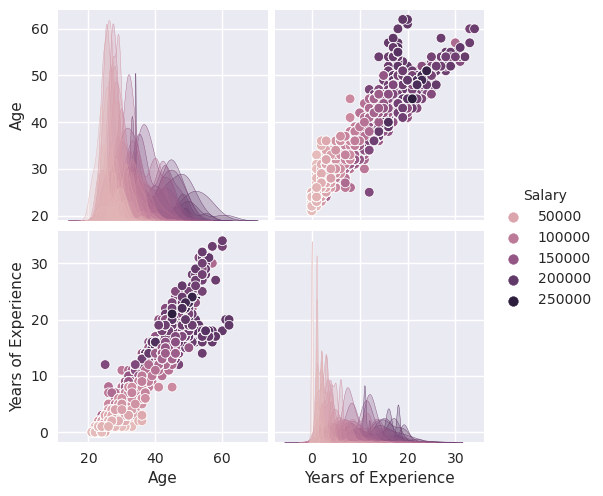

In [34]:
# Pair plot for numeric features
sns.pairplot(salary, hue='Salary')
plt.show()

# Data Preprocessing

In [35]:
# We will need to make one encoding for our categorical features (Education Level , Job Title) as they are important in our project and we just can't remove them

In [36]:
#Checking unique values of Education Level column

salary['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [37]:
# Define the mapping dictionary of Education Level
salary['Education Level'] = salary['Education Level'].map({
    "Bachelor's": 1,
    "Master's": 2,
    'PhD': 3,
    "Bachelor's Degree": 1,
   "Master's Degree": 2,
    'High School': 0,
    'phD': 3
    })

# We found some similar categories so we gather them in the same number.

In [38]:
# Define the mapping dictionary of Gender
salary['Gender'] = salary['Gender'].map({
    "Male": 0,
    "Female": 1,
    })

In [39]:
salary.head()

# As we can see the values have changed into numeric values so it become easier when we start creating our models.

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,0.0,1,Software Engineer,5.0,90000.0
1,28.0,1.0,2,Data Analyst,3.0,65000.0
2,45.0,0.0,3,Senior Manager,15.0,150000.0
3,36.0,1.0,1,Sales Associate,7.0,60000.0
4,52.0,0.0,2,Director,20.0,200000.0


In [40]:
# In case of "Job Title" we will need to use one hot encoding as it has a lot of roles and making a map will be a waste of time and health too xD.

In [41]:
one_hot_encoded = pd.get_dummies(salary['Job Title'])

# Concatenate the original DataFrame with the one-hot encoded columns
data_encoded = pd.concat([salary, one_hot_encoded], axis=1)

# Remove the original categorical feature
data_encoded.drop('Job Title', axis=1, inplace=True)

# Print the encoded DataFrame
print(data_encoded)

       Age  Gender  Education Level  Years of Experience    Salary  \
0     32.0     0.0                1                  5.0   90000.0   
1     28.0     1.0                2                  3.0   65000.0   
2     45.0     0.0                3                 15.0  150000.0   
3     36.0     1.0                1                  7.0   60000.0   
4     52.0     0.0                2                 20.0  200000.0   
...    ...     ...              ...                  ...       ...   
6699  49.0     1.0                3                 20.0  200000.0   
6700  32.0     0.0                0                  3.0   50000.0   
6701  30.0     1.0                1                  4.0   55000.0   
6702  46.0     0.0                2                 14.0  140000.0   
6703  26.0     1.0                0                  1.0   35000.0   

      Account Manager  Accountant  Administrative Assistant  \
0                   0           0                         0   
1                   0           0

In [42]:
# I don't know if that was the best choice , I'm still learning :p
# if you got another solution for this case let me know please and thanks in advance!

#                  !!!!!!!!!!!!!!!!!!!!!!!
# data_encoded -> It's going to be the new name of our dataset

In [43]:
# I guess our data is ready now to be trained

In [44]:
#Preparing the data features and target
columns = data_encoded.columns.tolist()
columns.remove("Salary")

# Insert the column at the new position
columns.insert(197, "Salary")     # 197 is the last column index

# Reindex the DataFrame with the updated column order
data_encoded = data_encoded.reindex(columns=columns)


# I wanted to get the target (Salary) into the end of the dataframe to make the shape clean and easy for us to choose when we split the dataset into training and testing

In [45]:
data_encoded.head()

#As we can see Salary has moved to the last index

,Age,Gender,Education Level,Years of Experience,Account Manager,Accountant,Administrative Assistant,Back end Developer,Business Analyst,Business Development Manager,...,Technical Recruiter,Technical Support Specialist,Technical Writer,Training Specialist,UX Designer,UX Researcher,VP of Finance,VP of Operations,Web Developer,Salary
0,32.0,0.0,1,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90000.0
1,28.0,1.0,2,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,65000.0
2,45.0,0.0,3,15.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,150000.0
3,36.0,1.0,1,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60000.0
4,52.0,0.0,2,20.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200000.0


In [46]:
print(data_encoded.isnull().sum())

# I found some Nan values in Gender col. :p

Age                     0
Gender                 14
Education Level         0
Years of Experience     0
Account Manager         0
                       ..
UX Researcher           0
VP of Finance           0
VP of Operations        0
Web Developer           0
Salary                  0
Length: 198, dtype: int64


In [47]:
#removing NaN values from Gender col.
data_encoded.dropna(subset=['Gender'], inplace=True)


In [48]:
data_encoded.isnull().sum()

# Mission Done :D

Age                    0
Gender                 0
Education Level        0
Years of Experience    0
Account Manager        0
                      ..
UX Researcher          0
VP of Finance          0
VP of Operations       0
Web Developer          0
Salary                 0
Length: 198, dtype: int64

In [49]:
#Splitting Dataset into X , y
X = data_encoded.iloc[: , 0:196]
y = data_encoded.iloc[: , -1]




In [50]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2)

# Decision Tree Regressor

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2_tree = r2_score(y_test, y_pred)
print("R-squared:", r2_tree)

accuracy = r2_tree * 100
print("Accuracy: " , accuracy, "%")

Mean Squared Error: 89859264.2965499
R-squared: 0.9677974542607607
Accuracy:  96.77974542607608 %


# RandomForestRegressor

In [52]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2_forest = r2_score(y_test, y_pred)
print("R-squared:", r2_forest)

accuracy = r2_forest * 100
print("Accuracy: " , accuracy, "%")

Mean Squared Error: 72588720.85236257
R-squared: 0.973986637641648
Accuracy:  97.3986637641648 %


# Neural Network using tensorflow

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(1)
])


model.summary()


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                12608     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4

In [54]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
147/147 [==============================] - 2s 3ms/step - loss: 8380750848.0000
Epoch 2/20
147/147 [==============================] - 0s 2ms/step - loss: 1051593152.0000
Epoch 3/20
147/147 [==============================] - 0s 2ms/step - loss: 945463872.0000
Epoch 4/20
147/147 [==============================] - 0s 3ms/step - loss: 851104192.0000
Epoch 5/20
147/147 [==============================] - 0s 2ms/step - loss: 772087616.0000
Epoch 6/20
147/147 [==============================] - 0s 2ms/step - loss: 686652672.0000
Epoch 7/20
147/147 [==============================] - 0s 2ms/step - loss: 601239552.0000
Epoch 8/20
147/147 [==============================] - 0s 2ms/step - loss: 559403520.0000
Epoch 9/20
147/147 [==============================] - 0s 2ms/step - loss: 520539648.0000
Epoch 10/20
147/147 [==============================] - 0s 2ms/step - loss: 512429536.0000
Epoch 11/20
147/147 [==============================] - 0s 2ms/step - loss: 504413344.0000
Epoch 12/20
147/1

In [55]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


63/63 [==============================] - 0s 1ms/step
Mean Squared Error: 402619274.81867695


In [56]:
r2_nn = r2_score(y_test, y_pred)
print("R-squared:", r2_nn)

accuracy = r2_nn * 100
print("Accuracy: " , accuracy , "%")

R-squared: 0.8557147589138941
Accuracy:  85.57147589138941 %


**> > After finishing this project!**

In this project I was interested to use one hot encoding , clean data and fill empty values and try neural network model and many other things tbh as I'm interested too in visualizing data. 
in my next projects I will try different techniques and ways as I'm already satisfied with what I gained right now and I hope you guys like my work!